# Сравнение временных рядов

Задание: Сравнить временные ряды (варианты по методам и наборам данных) с эталонным сигналом и идентифицировать состояние.

Может быть применено на данных: ЭКГ, ЭЭГ, работа мотора автомобиля, идентификация состояния оборудования и др.

Загрузим данные. Будем анализировать данные о работе подшипников:

In [73]:
# данные тут https://goo.su/czY7

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# b30hz0.txt - не нормативная работа подшипника (сигналы с четырех датчиков вибрации)
data1 = pd.read_csv(fr"C:\Users\Анна\Desktop\HSE courses\ML занятия\HSE ML\HSE ML\DataSets\b30hz0.txt", sep="\t", header=None).drop(columns=[4])
# h30hz0.txt - нормативная работа подшипника (сигналы с четырех датчиков вибрации)
data2 = pd.read_csv(fr"C:\Users\Анна\Desktop\HSE courses\ML занятия\HSE ML\HSE ML\DataSets\h30hz0.txt", sep="\t", header=None).drop(columns=[4])

# Переименование столбцов
data1.columns = ["s1", "s2", "s3", "s4"]
data2.columns = ["s1", "s2", "s3", "s4"]

In [74]:
# выберем 200 значений для анализа
n1 = 1
n2 = 200

data1_part = data1.loc[n1:n2]
data2_part = data2.loc[n1:n2]

In [75]:
data1_part

,s1,s2,s3,s4
1,2.452970,1.400100,-2.825100,0.984487
2,-0.241284,-0.267390,0.793540,0.605862
3,1.130270,-0.890918,0.696969,0.613068
4,-1.296140,0.980479,-1.130560,-0.346971
5,-1.650290,1.011530,-2.035570,-2.419540
...,...,...,...,...
196,2.008710,-1.702090,-2.181540,1.443810
197,-0.463829,0.336204,-2.404620,-1.808730
198,-3.372610,6.018860,-3.982170,-2.054900
199,-4.541170,9.629470,-2.711160,-1.102500


Визуализаруем данные:

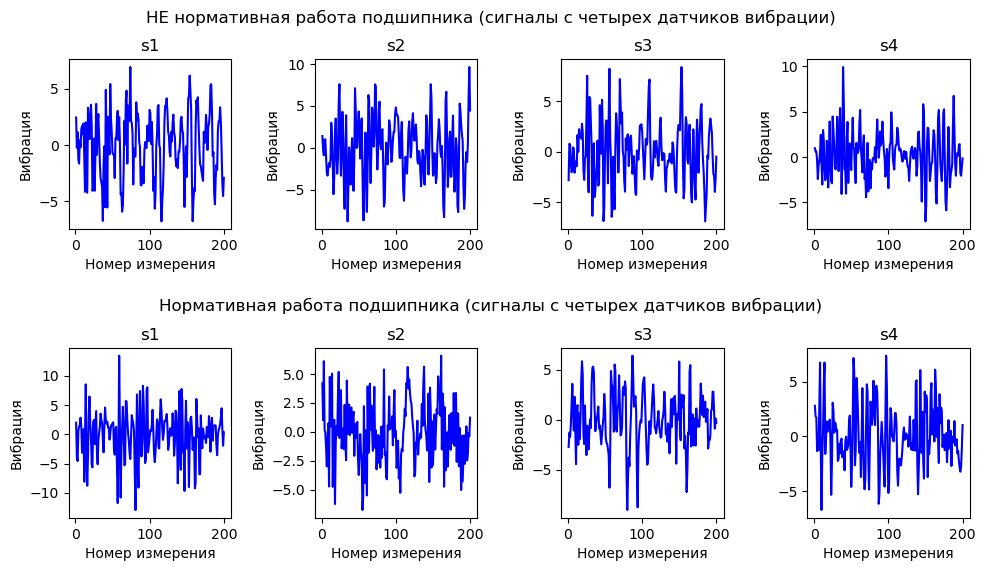

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Добавление подзаголовка для первого ряда
plt.gcf().text(0.5, 0.96, 'НЕ нормативная работа подшипника (сигналы с четырех датчиков вибрации)', ha='center', va='center', fontsize=12)

# Построение первого ряда графиков
for i, col in enumerate(data1_part.columns):
    plt.subplot(2, 4, i+1)
    plt.plot(range(n1, n2+1), data1_part[col], color='blue')
    plt.xlabel("Номер измерения")
    plt.ylabel("Вибрация")
    plt.title(f"s{i+1}")

# Добавление подзаголовка для второго ряда
plt.gcf().text(0.5, 0.48, 'Нормативная работа подшипника (сигналы с четырех датчиков вибрации)', ha='center', va='center', fontsize=12)

# Построение второго ряда графиков
for i, col in enumerate(data2_part.columns):
    plt.subplot(2, 4, i+5)
    plt.plot(range(n1, n2+1), data2_part[col], color='blue')
    plt.xlabel("Номер измерения")
    plt.ylabel("Вибрация")
    plt.title(f"s{i+1}")



plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Настройка отступов
plt.subplots_adjust(hspace=0.7) # Увеличение вертикального расстояния между рядами



### Корреляция

**Корреляция** — статистическая взаимосвязь двух или более величин. При этом изменения значений одной или нескольких из этих величин сопутствуют систематическому изменению значений другой или других величин.

Математической мерой корреляции двух величин служит *корреляционный коэффициент*.

Важной характеристикой совместного распределения двух случайных величин является *ковариация* (или корреляционный момент). Ковариация определяется как математическое ожидание произведения отклонений случайных величин:

$cov(X, Y) = \sigma_{X,Y} = E[(X−E[X])(Y−E[Y])]=E[XY]-E[X]E[Y]$, где $E$ - это математическое ожидание.

Если ковариация положительна, то с ростом значений одной случайной величины значения второй имеют тенденцию возрастать, а если знак отрицательный — то убывать.

Однако только по абсолютному значению ковариации нельзя судить о том, насколько сильно величины взаимосвязаны, т. к. ее масштаб зависит от их дисперсий.
Масштаб можно отнормировать, поделив значение ковариации на произведение среднеквадратических отклонений (квадратных корней из дисперсий). При этом получается так называемый линейный коэффициент корреляции, или **корреляционный коэффициент Пирсона (Брависа — Пирсона)**, который оценивает корреляцию между наборами данных, заданными парами значений $(x_i, y_i) и (\tilde{x_i}, \tilde{y_i})$, при $i =1, ..., n$ :

$ r = \frac{cov(X, Y)}{\sigma_X \sigma_Y}$, где $\sigma $ - среднеквадратическое отклонение.

Получаемое значение будет лежать в диапазоне $-1 \leq r \leq 1$:  $r > 0$ — позитивная корреляция; $r < 0$ — негативная корреляция; $r = 0$ — отсутствие корреляции;

$| r |< 0,5$ — слабая корреляция; $0,5 ≤| r |≤ 0,8$ — средняя корреляция; $0,8 <| r |$ — сильная корреляция.

Но будьте аккуратны с интерпретацией результатов! 

![Забавный комикс](https://marketoonist.com/wp-content/uploads/2014/04/140414b.correlation.jpg)

##### Другие корреляционные коэффициенты

**Коэффициент корреляции Спирмена (Spearman rank correlation coefficient)** — мера линейной связи между случайными величинами. Корреляция Спирмена является ранговой, то есть для оценки силы связи используются не численные значения, а соответствующие им ранги. Коэффициент инвариантен по отношению к любому монотонному преобразованию шкалы измерения.

Коэффициент считается по следующей формуле:

$\rho = 1 - \frac{6}{n(n-1)(n+1)\sum{i=1}^N (R_i - S_i)^2}$, где $R_i$ - ранг наблюдения $x_i$ в ряду $X$, $S_i$ ранг наблюдения $y_i$ в ряду $Y$.

Коэффициент $\rho$ принимает значения из отрезка $[-1;1]$. Равенство $\rho=1$ указывает на строгую прямую линейную зависимость, $\rho=-1$ на обратную.

**Коэффициент корреляции Кенделла (Kendall tau rank correlation coefficient)** 

Коэффициент корреляции Кенделла вычисляется по формуле:

$\tau=1-\frac{4}{n(n-1)}R$, где $R = \sum_{i=1}^{n-1}\sum_{j=i+1}^n\left[ \left[ x_i\ <\ x_j \right] \neq \left[ y_i\ <\ y_j \right] \right]$ — количество инверсий, образованных величинами $y_i$, расположенными в порядке возрастания соответствующих $x_i$.

Коэффициент $\tau$ принимает значения из отрезка $[-1;1]$. Равенство $\tau=1$ указывает на строгую прямую линейную зависимость, $\tau=-1$ на обратную.

*Использованы материалы http://www.machinelearning.ru/wiki/*

| Коеффициент | Тип данных | Метод | Интерпретация |
|----------|----------|----------|----------|
| Пирсон    | Используется для количественных данных, которые имеют нормальное распределение   | Измеряет линейную зависимость между двумя переменными. Он основан на значениях самих переменных  | Значение коэффициента варьируется от -1 до 1, где 1 означает полную положительную линейную зависимость, -1 — полную отрицательную, а 0 — отсутствие линейной зависимости|
| Спирмен   |Применяется для ранговых данных или для количественных данных, которые не обязательно имеют нормальное распределение  | Оценивает монотонную зависимость между переменными, используя ранги вместо исходных значений. Это делает его более устойчивым к выбросам | Также варьируется от -1 до 1, но отражает не только линейные, но и нелинейные монотонные зависимости |
| Кендалл   | Подходит для ранговых данных и может использоваться для количественных данны | Оценивает степень согласия между двумя переменными, основываясь на парных сравнениях. Он вычисляет разницу между количеством согласованных и несогласованных пар  | Значение также варьируется от -1 до 1, но обычно имеет меньшие абсолютные значения по сравнению с коэффициентом Спирмена, что делает его более консервативным |\



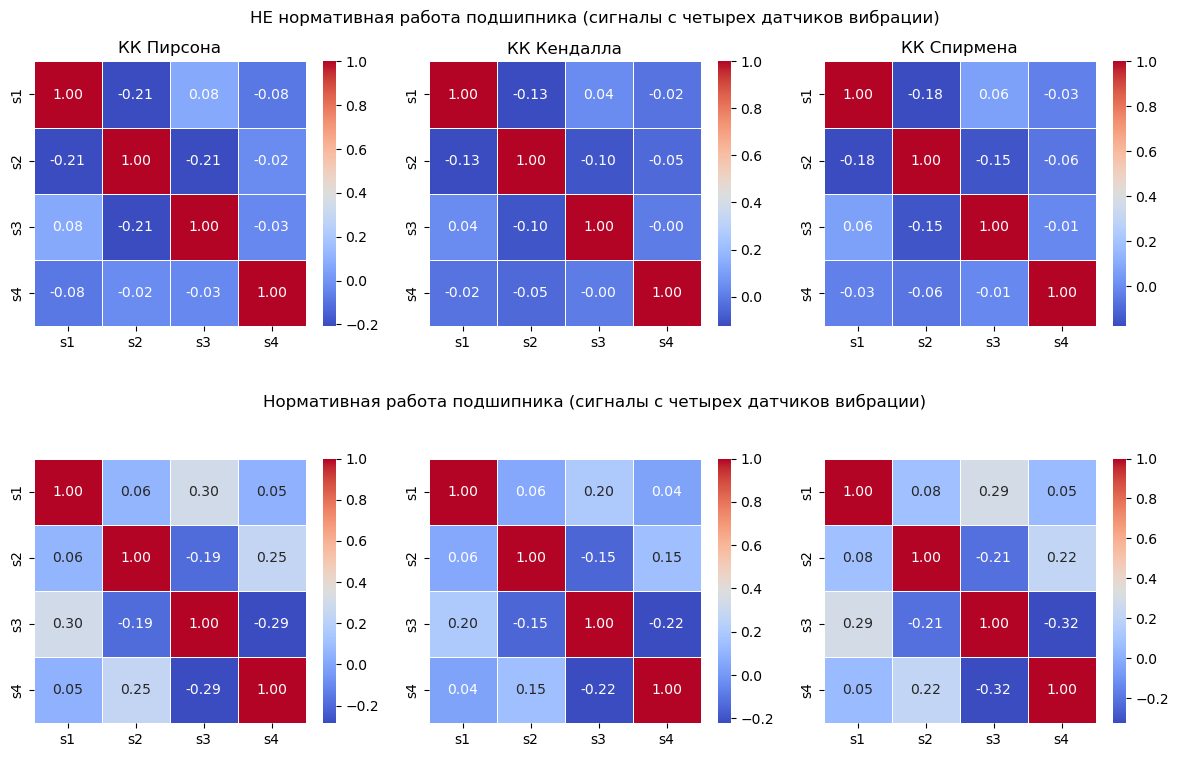

In [77]:
# Расчет коэффициентов корреляции

import seaborn as sns

plt.figure(figsize=(12,8))

# Добавление подзаголовка для первого ряда
plt.gcf().text(0.5, 0.96, 'НЕ нормативная работа подшипника (сигналы с четырех датчиков вибрации)', ha='center', va='center', fontsize=12)

corr_pearson = data1_part.corr()
corr_kendall = data1_part.corr(method='kendall')
corr_spearman = data1_part.corr(method='spearman')
plt.subplot(2, 3, 1)
plt.title('КК Пирсона')
sns.heatmap(corr_pearson,cmap='coolwarm',annot=True, fmt=".2f", linewidths=0.5)

plt.subplot(2, 3, 2)
plt.title('КК Кендалла')
sns.heatmap(corr_kendall,cmap='coolwarm',annot=True, fmt=".2f", linewidths=0.5)

plt.subplot(2, 3, 3)
plt.title('КК Спирмена')
sns.heatmap(corr_spearman,cmap='coolwarm',annot=True, fmt=".2f", linewidths=0.5)


# Добавление подзаголовка для второго ряда
plt.gcf().text(0.5, 0.48, 'Нормативная работа подшипника (сигналы с четырех датчиков вибрации)', ha='center', va='center', fontsize=12)

corr_pearson_2 = data2_part.corr()
corr_kendall_2 = data2_part.corr(method='kendall')
corr_spearman_2 = data2_part.corr(method='spearman')
plt.subplot(2, 3, 4)
sns.heatmap(corr_pearson_2,cmap='coolwarm',annot=True, fmt=".2f", linewidths=0.5)

plt.subplot(2, 3, 5)
sns.heatmap(corr_kendall_2,cmap='coolwarm',annot=True, fmt=".2f", linewidths=0.5)

plt.subplot(2, 3, 6)
sns.heatmap(corr_spearman_2,cmap='coolwarm',annot=True, fmt=".2f", linewidths=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Настройка отступов
plt.subplots_adjust(hspace=0.5) # Увеличение вертикального расстояния между рядами
plt.show()


### Метод динамической трансформации временной шкалы (евклидово расстояние и $L_p$-норма)

Различие между двумя временными рядами $C = (c_1, c_2, ..., c_n)$ и $Q=(q_1, q_2, ..., q_n)$ длины $n$ может быть определено следующим образом (евклидово расстояние):

$L_2(C, Q) = \sqrt{\sum_{i=1}^N (c_i - q_i)^2}$.

Альтернативным способом определения различия может быть определение $L_p$-нормы(расстояние Минковского):

$L_p(C, Q) = |\sum_{i=1}^N (c_i - q_i)^p|^{\frac{1}{p}}$.

Евклидово расстояние — одна из самых распространенных мер определения отличий между временными рядами, в случае если разница между C и Q обусловлена только гауссовым шумом. Недостатком подхода можно считать, что он не работает
с ненормализованными временными рядами. 

Нормализация позволяет выявить сходство двух временных рядов в некоторых случаях. Однако она остается непригодна для случаев, когда имеется ускорение или замедление времени (несоответствие шагов времени двух временных рядов).

Эта проблема может быть устранена с помощью трансформации временной шкалы. Для того чтобы найти сходство, необходимо трансформировать ось времени для нахождения лучшего подобия.

1. Первый этап алгоритма состоит в следующем. Строим матрицу $d$ порядка $n×m$ (матрицу расстояний), в которой элемент $d_{i,j}$ есть расстояние $d(q_i, c_i)$ между двумя точками $q_i$ и $c_j$. Обычно используется евклидово расстояние

$d(q_i, c_i) = (q_i - c_j)^2$, или $d(q_i, c_i) = |q_i - c_j|$.

Каждый элемент $(i, j)$ матрицы соответствует выравниванию между точками $q_i$ и $c_j$.

2. На втором этапе строим матрицу трансформаций (деформаций) $D$, каждый элемент которой вычисляется из следующего соотношения:

$D_{i,j} = d_{i,j} + min(D_{i-1,j}, D_{i-1, j-1}, D_{i, j-1})$

3. После заполнения матрицы трансформации переходим к заключительному этапу — построению некоторого оптимального пути трансформации (деформации). Путь трансформации $W$ — это набор смежных элементов матрицы, который устанавливает соответствие между $Q$ и $C$ . Он представляет собой путь, который минимизирует общее расстояние между $Q$ и $C$ . 
k -й элемент пути W определяется как

$w_k = (i,j)_k, d(w_k) = d(q_i, c_i)$

Таким образом, $W = (w_1, w_2, ..., w_k, ..., w_K ); max(m,n) \leq K < m+n$, где $K$ - длин пути.

Путь трансформации должен удовлетворять следующим ограничивающим условиям:

1. Монотонность – путь никогда не возвращается, то есть: оба индекса, $i$ и $j$, которые используются в последовательности, никогда не уменьшаются.

2. Непрерывность – последовательность продвигается постепенно: за один шаг индексы, $i$ и $j$, увеличиваются не более чем на 1.

3. Предельность – последовательность начинается в левом нижнем углу и заканчивается в правом верхнем.

DTW-расстояние (стоимость пути) между двумя последовательностями рассчитывается на основе оптимального пути трансформации с помощью формулы:

$DTW(Q, C) = min(\frac{\sum_{k=1}^K d(w_k)}{K})$

По сути, построение маршрута - классическая задача динамического программирования.

*По материалам Л.А. Мыльников "Статистические методы интеллектуального анализа данных"*

In [78]:
# %pip install dtw-python

In [79]:
data1_part = data1_part.reset_index()
data2_part = data2_part.reset_index()

Distance: 471.20715810000013
Normalized Distance: 1.1780178952500002


<Axes: xlabel='Index', ylabel='Query value'>

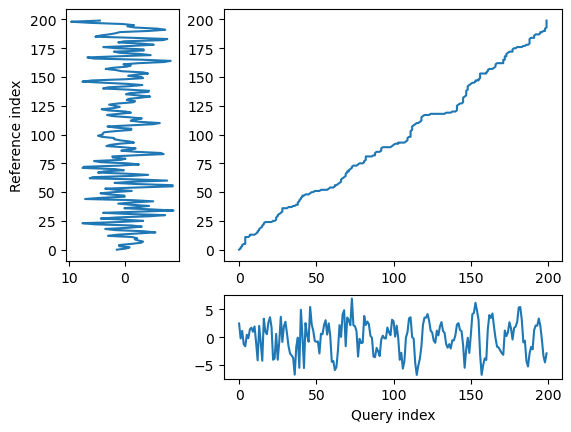

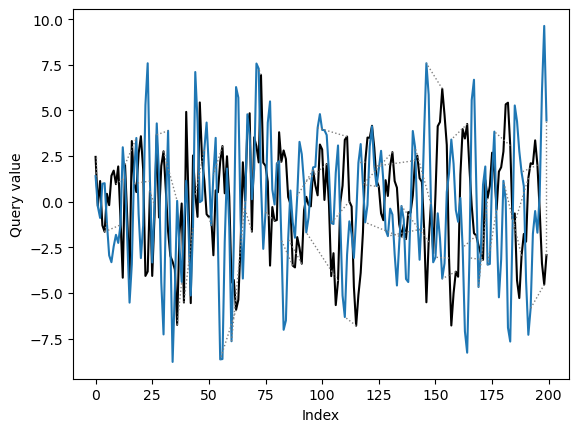

In [80]:
from dtw import *

# Рассчет DTW
alignment = dtw(data1_part['s1'], data1_part['s2'], keep_internals=True)
distance = alignment.distance
normalized_distance = alignment.normalizedDistance

# Вывод результатов
print("Distance:", distance)
print("Normalized Distance:", normalized_distance)

# Этот график отображает три элемента:
# Исходный временной ряд s1
# Исходный временной ряд s2
# Кривую выравнивания (warping curve), которая показывает, как точки одного временного ряда соответствуют точкам другого
# Это позволяет визуально оценить, как два ряда были "сжаты" или "растянуты" для достижения наилучшего соответствия
alignment.plot(type="threeway")

# Этот график показывает только два временных ряда и их выравнивание. 
# Он иллюстрирует, как точки из s1 и s2 соотносятся друг с другом, без дополнительных элементов. 
# Это позволяет сосредоточиться на самом выравнивании и увидеть, как временные ряды "перекрываются"
alignment.plot(type="twoway")


### Внимание!

Ваша задачи в этой работе: посчитать значение DTW для всех сочетаний, сравнить со значениями коэффициентов корреляции, сделать выводы.

In [ ]:
# TODO: Посчитать значение DTW для всех сочетаний, сравнить со значениями коэффициентов корреляции, сделать выводы


### Периодограмма

**Периодограмма** — оценка спектральной плотности мощности (СПМ, PSD = Power Spectral Density), основанная на вычислении квадрата модуля преобразования Фурье последовательности данных. 

Простыми словами: это метод анализа сигналов, который позволяет оценить, как мощность сигнала распределяется по частотам. 

Ещё проще говоря, это график, который показывает, какие частоты в сигнале присутствуют и с какой силой.

*Примечание:* Преобразование Фурье и, в частности, быстрое преобразование Фурье - важнейший алгоритм в области обработки сигналов. Он применяется в обработке звука, вибраций, изображений, телекоммуникациях, анализе сигналов ЭЭГ и ЭКГ и других временных рядов.

Подробее ознакомиться с алгоритмом можно, например, тут: https://proglib.io/p/fourier-transform

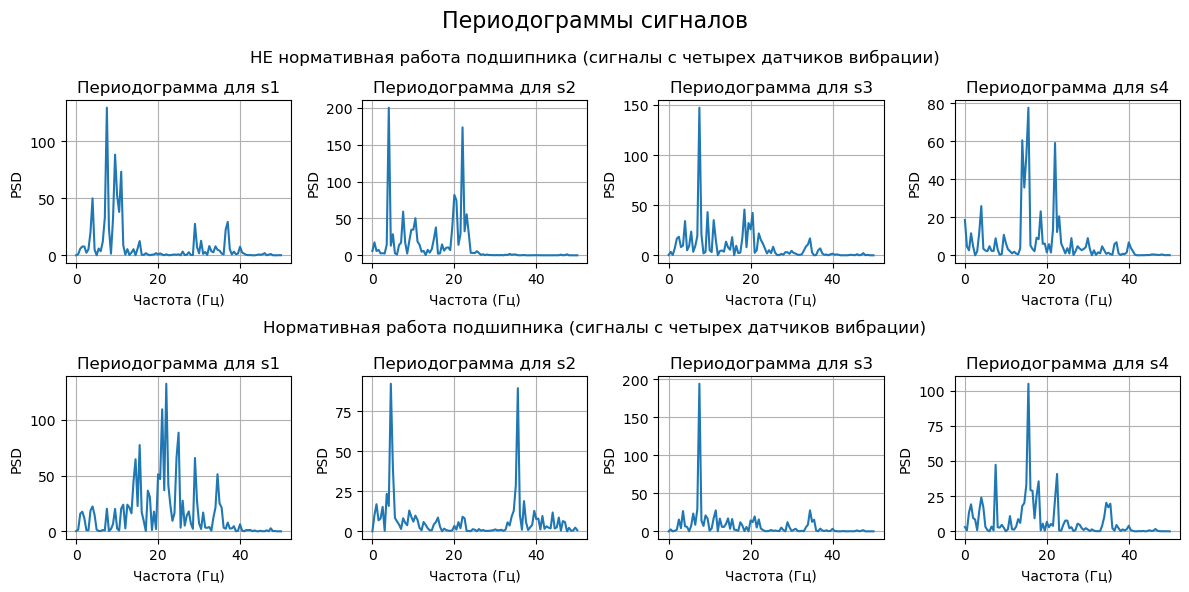

In [81]:
import numpy as np
import matplotlib.pyplot as plt

def plot_periodogram(signal, i, label):
    fs = 100  # частота дискретизации
    # Применение FFT
    frequencies = np.fft.rfftfreq(len(signal), d=1/fs)
    fft_values = np.fft.rfft(signal)

    # Вычисление спектральной плотности
    psd = np.abs(fft_values)**2 / len(signal)

    # Визуализация
    plt.subplot(2, 4, i + 1)  # Индекс для подграфиков
    plt.plot(frequencies, psd)
    plt.title(label)
    plt.xlabel('Частота (Гц)')
    plt.ylabel('PSD')
    plt.grid()

# Создание фигуры
plt.figure(figsize=(12, 6))

# Добавление заголовков для рядов графиков
plt.suptitle('Периодограммы сигналов', fontsize=16)

# Построение периодограмм для первого набора данных
for i, col in enumerate(data1_part.columns[1:]):
    plot_periodogram(data1_part[col], i, f"Периодограмма для s{i+1}")

# Добавление подзаголовка для первого ряда
plt.gcf().text(0.5, 0.9, 'НЕ нормативная работа подшипника (сигналы с четырех датчиков вибрации)', ha='center', va='center', fontsize=12,)

# Построение периодограмм для второго набора данных
for i, col in enumerate(data2_part.columns[1:]):
    plot_periodogram(data2_part[col], i + 4, f"Периодограмма для s{i+1}")

# Добавление подзаголовка для второго ряда
plt.gcf().text(0.5, 0.45, 'Нормативная работа подшипника (сигналы с четырех датчиков вибрации)', ha='center', va='center', fontsize=12)

# Настройка отступов
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Учитываем место для заголовка
plt.subplots_adjust(hspace=0.7) # Увеличение вертикального расстояния между рядами
plt.show()

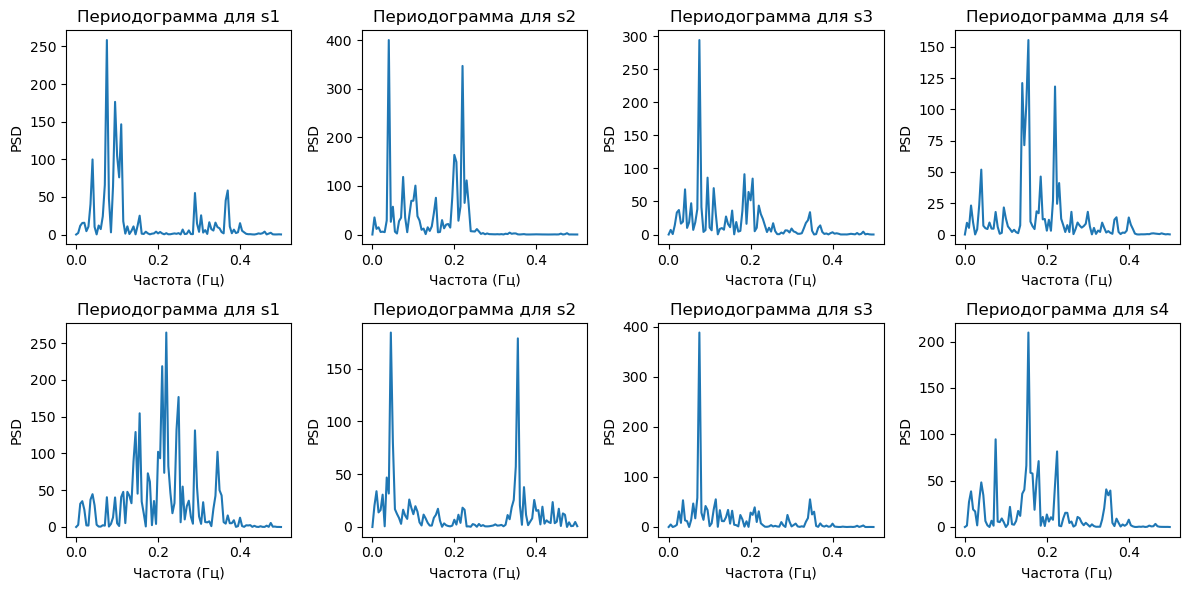

In [82]:
# Периодограммы из scipy.signal

from scipy.signal import periodogram

plt.figure(figsize=(12, 6))

def plot_periodogram(data, i, label):
    f, Pxx = periodogram(data)
    plt.subplot(2, 4, i+1)
    plt.plot(f, Pxx)
    plt.xlabel("Частота (Гц)")
    plt.ylabel('PSD')
    plt.title(label)

for i, col in enumerate(data1_part.columns[1:]):
    plot_periodogram(data1_part[col], i, f"Периодограмма для s{i+1}")

for i, col in enumerate(data2_part.columns[1:]):
    plot_periodogram(data2_part[col], i+ 4, f"Периодограмма для s{i+1}")

plt.tight_layout()

### Декомпозиция по сезонным трендам с помощью LOESS

Декомпозиция по сезонным трендам с помощью LOESS (Seasonal and Trend decomposition using Loess, **STL**) - это надежный метод декомпозиции временных рядов, который часто используется в экономическом анализе и анализе окружающей среды. В методе STL используются локально подобранные регрессионные модели для разложения временного ряда на компоненты тренда, сезонности и остатка.

LOESS расшифровывается как "Locally Estimated Scatterplot Smoothing". Это метод нелинейной регрессии, который используется для сглаживания данных и оценки зависимостей между переменными.

Вы можете применить STL к любому набору данных, но значимые результаты будут получены только в том случае, если в данных есть повторяющаяся временная закономерность (например, качество воздуха ухудшается в теплые месяцы, либо онлайн-шоппинг возрастает в четвертом квартале каждого года). Закономерность отображается в результатах STL как сезонный компонент.

Алгоритм STL сглаживает временные ряды с помощью LOESS в двух циклах; внутренний цикл выполняет итерацию между сезонным сглаживанием и сглаживанием тренда, а внешний цикл минимизирует влияние выбросов. В ходе внутреннего цикла сезонный компонент вычисляется первым и удаляется для вычисления компонента тренда. Остаток вычисляется путем вычитания сезонного и трендового компононентов из временных рядов.

Эти три компонента анализа STL связаны с сырыми временными рядами следующим образом:

$y_i = s_i + t_i + r_i$, где

$y_i$ - значение временного ряда в точке i.

$s_i$ - начение сезонного компонента в точке i.

$t_i$ - значение компонента тренда в точке i.

$r_i$ - значение компонента остатка в точке i.

*Материалы https://doc.arcgis.com/ru/insights/latest/analyze/stl.htm*

In [ ]:
# %pip install statsmodels

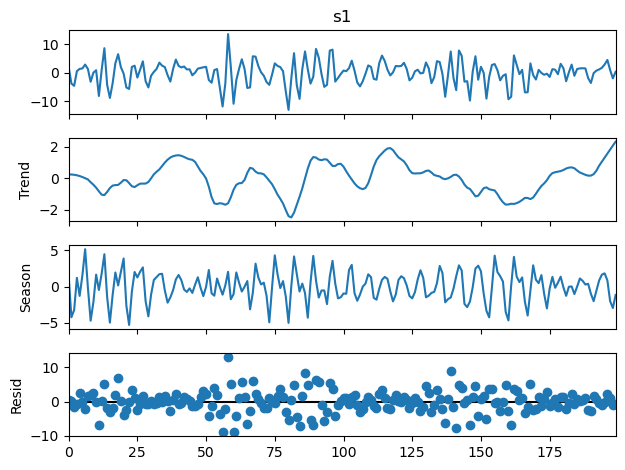

In [100]:
from statsmodels.tsa.seasonal import STL

# STL разложение
stl_result = STL(data2_part['s1'], period=7).fit()

# График STL разложения
stl_result.plot()
plt.show()

In [98]:
# Получение компонентов
trend = stl_result.trend
seasonal = stl_result.seasonal
residual = stl_result.resid

In [99]:
# TODO: Разложить ВСЕ временные ряды на составляющие


In [ ]:
# Дополнительный балл: Спрогнозировать составляющие полученные при разложении методом STL с использованием методов с предыдущего семинара, 
# восстановить прогнозные значения (просуммировать тренд, сезонную компоненту и остатки) и построить графики исходного и прогнозного временных рядов

